# Exploratory Data Analysis of Zomato Dataset

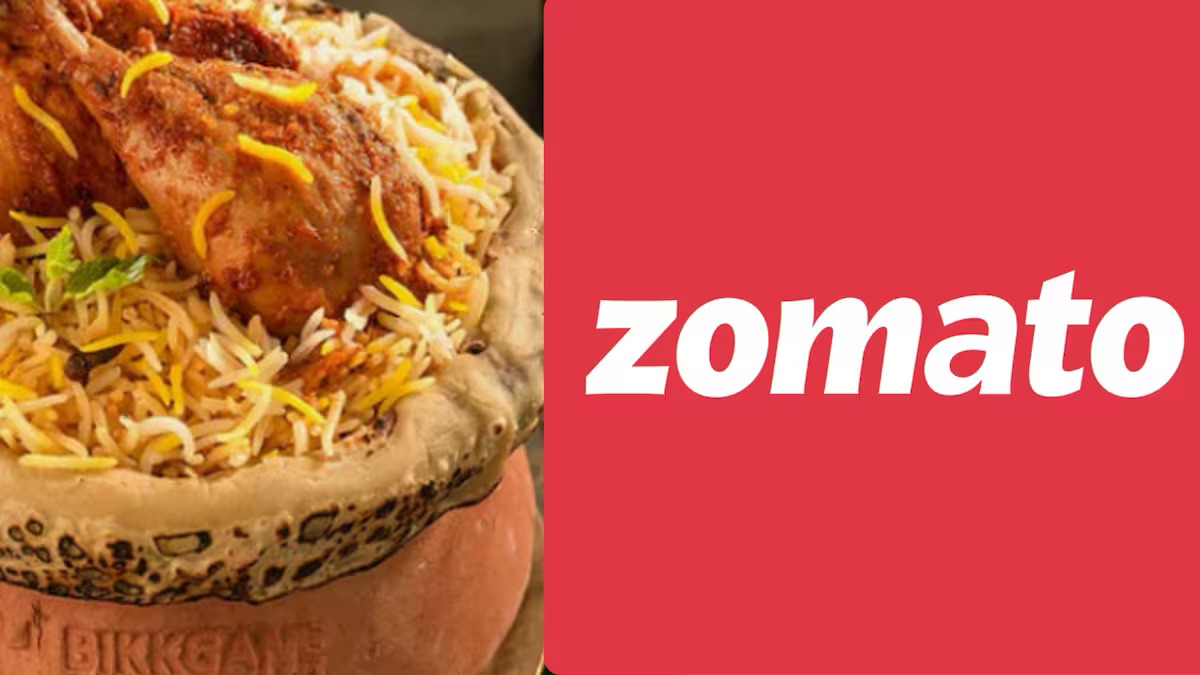

The Zomato dataset is a comprehensive collection of information about restaurants across various cities worldwide. It includes details such as the restaurant's unique identifier, name, location, address, cuisine offerings, average cost for two people, currency, reservation options, online delivery availability, and various other attributes. The dataset also provides insights into the popularity and customer feedback, featuring aggregate ratings, rating colors, rating text, and the number of votes received.


Data Storage:
The collected data has been stored in the Comma Separated Value file `Zomato.csv`. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

- `Restaurant Id`: Unique id of every restaurant across various cities of the world
- `Restaurant Name`: Name of the restaurant
- `Country Code`: Country in which restaurant is located
- `City`: City in which restaurant is located
- `Address`: Address of the restaurant
- `Locality`: Location in the city
- `Locality Verbose`: Detailed description of the locality
- `Longitude`: Longitude coordinate of the restaurant's location
- `Latitude`: Latitude coordinate of the restaurant's location
- `Cuisines`: Cuisines offered by the restaurant
- `Average Cost for two`: Cost for two people in different currencies 👫
- `Currency`: Currency of the country
- `Has Table booking`: yes/no
- `Has Online delivery`: yes/ no
- `Is delivering`: yes/ no
- `Switch to order menu`: yes/no
- `Price range`: range of price of food
- `Aggregate Rating`: Average rating out of 5
- `Rating color`: depending upon the average rating color
- `Rating text`: text on the basis of rating of rating
- `Votes`: Number of ratings casted by people

**Possible Analysis and Questions:**

- Geographical Distribution:

Explore the distribution of restaurants across different countries and cities.
Identify the cities with the highest number of restaurants.


- Rating Analysis:

Explore the distribution of aggregate ratings.

- Correlation Analysis:

Explore potential correlations between variables (rating and votes).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100) # setting maximum number of columns
zomato_data = pd.read_csv('Zomatodataset/zomato.csv', encoding = 'latin-1') # dataset is encoded in latin-1
zomato_data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5521,310162,Sai Rasoi,1,New Delhi,"Shop 1, D-1, Moti Nagar, New Delhi",Moti Nagar,"Moti Nagar, New Delhi",0.000000,0.000000,"Chinese, North Indian",500,Indian Rupees(Rs.),No,No,No,No,2,3.1,Orange,Average,9
4132,308716,Tihar Food Court,1,New Delhi,"Tihar Jail Complex, Opposite Indraprastha Gas ...",Jail Road,"Jail Road, New Delhi",77.104033,28.619788,Fast Food,300,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,14
4527,5083,Chawla Di Hutti,1,New Delhi,"Opposite Auto Stand, Old Delhi Gurgaon Road, N...",Kapashera,"Kapashera, New Delhi",77.078896,28.516478,North Indian,700,Indian Rupees(Rs.),No,No,No,No,2,3.1,Orange,Average,59
1336,1028,Apni Rasoi,1,Gurgaon,"U 1/52-53, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093633,28.491291,"North Indian, Chinese",400,Indian Rupees(Rs.),No,Yes,No,No,1,3.0,Orange,Average,160
2494,18216876,The English Department Bar & Diner,1,Mumbai,"Malad link Road, Near Inorbit Mall Junction, M...",Malad West,"Malad West, Mumbai",72.836721,19.176269,"Italian, Continental, Mexican, Japanese, Ameri...",1500,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,885


## columns present in the dataset

In [3]:
zomato_data.columns # printing the column names

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
zomato_data.info() # cheking the number of rows and datatype of each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
zomato_data.describe() # initial statistics of numerical features

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


When analysing the sescriptive statistics an interesting observation can be found on `Average Cost for two` column. the information about the `Average Cost for two` feature indicates that there might be outliers present. here is the interpretations:

- **Minimum (Min)**: The minimum value of 0.00 suggests that there are entries with a cost of zero. This could be valid or may indicate missing or erroneous data.

- **25th Percentile (25%)**: The 25th percentile (Q1) is 250. This means that 25% of the data falls below 250.

- **50th Percentile (50% or Mean)**: The mean (average) is 1199, indicating the central tendency of the data.

- **75th Percentile (75%)**: The 75th percentile (Q3) is 700. This means that 75% of the data falls below 700.

- **Maximum (Max)**: The maximum value is 800000, which is significantly higher than the 75th percentile.

- **Standard Deviation (std)**: The standard deviation is 16121, suggesting a relatively high degree of variability in the data.


<AxesSubplot:>

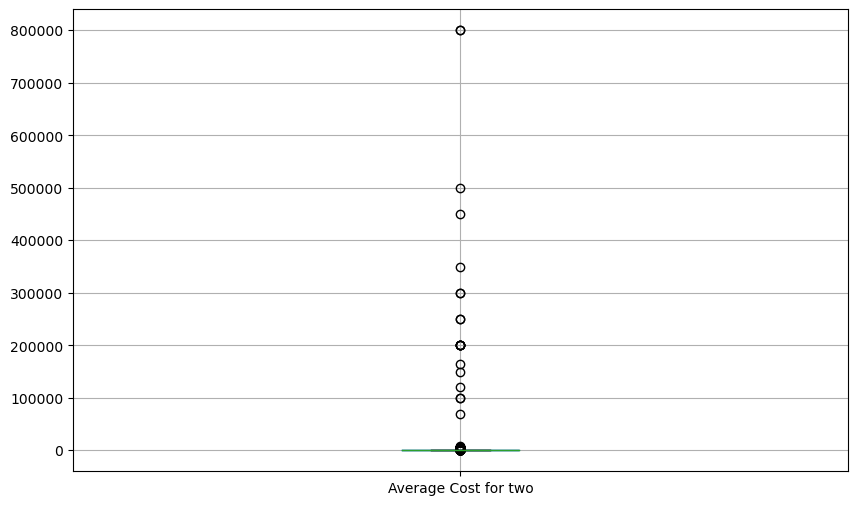

In [6]:
plt.figure(figsize = (10,6))
zomato_data.boxplot(column = 'Average Cost for two') 

There is outliers in the given feature, but for this analysis this column doesnt have any impact so i am not going to remove this outliers.

We are going deeper into the dataset and explore the following:
- Exploring missing values
- Explore the Numerical features
- Explore the Categorical features
- Find Correlation between features
- Checking the Duplicate entries

In [7]:
zomato_data.shape # There are 9551 rows and 21 columns

(9551, 21)

## Checking for Null Values

In [8]:
zomato_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[(feature, zomato_data[feature].isnull().sum(), round(zomato_data[feature].isnull().sum()/ len(zomato_data) * 100, 2))
  for feature in zomato_data.columns
  if zomato_data[feature].isnull().sum() != 0]

[('Cuisines', 9, 0.09)]

<AxesSubplot:>

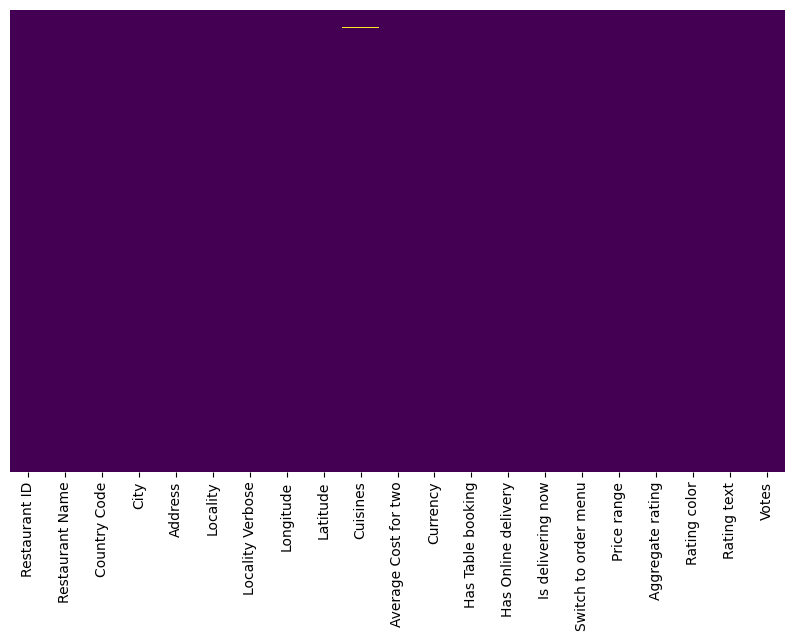

In [10]:
plt.figure(figsize = (10, 6))
sns.heatmap(zomato_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

- only one feature has missing value `Cusines`(0.09%). removing this missing values do not have a large impact on tehe analysis.

In [11]:
zomato_data = zomato_data.dropna() # droping the null values
zomato_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


## Merging of dataset

In [12]:
data_country = pd.read_excel('Zomatodataset/Country-Code.xlsx')# importing data that has country name corresponding to the country code.

In [22]:
data_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [23]:
data_final = pd.merge(left = zomato_data, right = data_country, on = 'Country Code', how = 'left')

In [24]:
data_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Country Contribution

In [26]:
countries = data_final['Country'].value_counts().index
number = data_final['Country'].value_counts().values

print(countries)
print(number)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')
[8652  425   80   60   60   60   40   34   24   22   21   20   20   20
    4]


## Top Three Countries

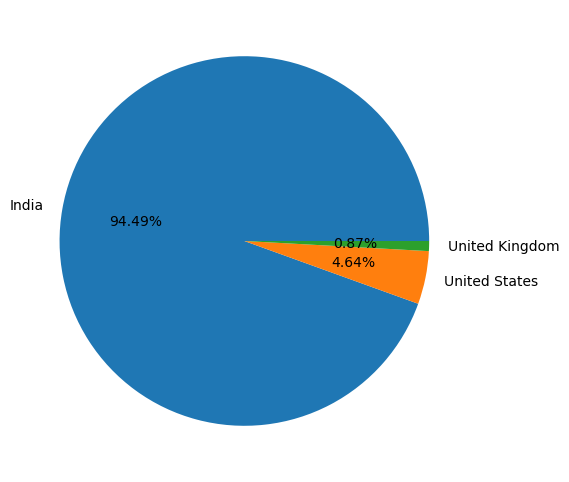

In [17]:
plt.figure(figsize = (10, 6))
plt.pie(number[:3] , labels = countries[:3], autopct = '%1.2f%%')
plt.show()

- The analysis revealed that the majority of the restaurants in the dataset are located in `India`, constituting a substantial `94.49%` of the total. Following India, `the United States` holds the second position with `4.64%`, while `the United Kingdom` is in the third position with `0.87%`.

- This distribution highlights the dominance of Indian restaurants in the dataset, reflecting Zomato's strong presence and popularity in India.

# Analysing the Rating 

In [18]:
rating_data = (data_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()
 .rename(columns = {0:'Rating Count'}))
rating_data

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In the analysis of restaurant ratings within the Zomato dataset, a bar plot was employed to visually represent the distribution of average ratings. Notably, it was observed that a considerable portion of customers did not contribute ratings, signifying that a substantial number of restaurants lack user feedback.

This insight emphasizes the importance of recognizing the limitations in the dataset and understanding that a sizable portion of establishments may not have received explicit ratings. The absence of ratings could be attributed to various factors, such as a recent opening, limited visibility on the platform, or perhaps a business model that doesn't heavily rely on customer reviews.

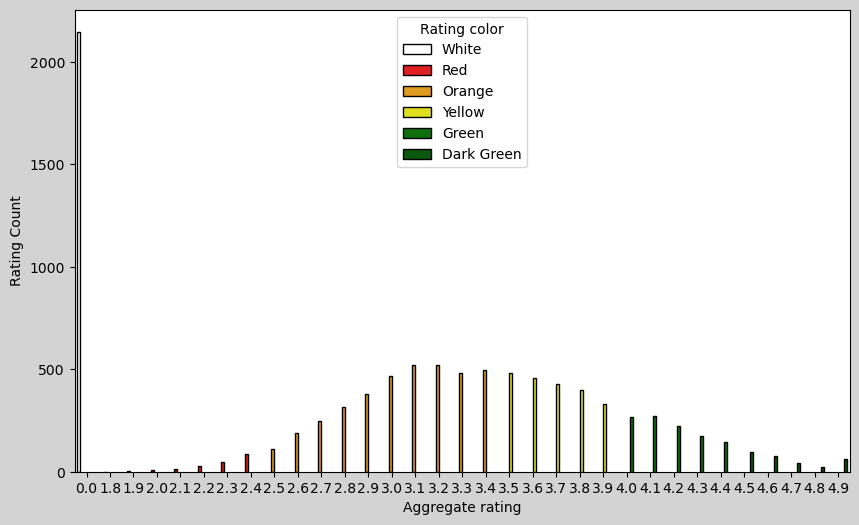

In [19]:
plt.figure(figsize = (10, 6), facecolor='lightgrey')
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data= rating_data, hue = 'Rating color', palette = ['white', 'red', 'orange', 'yellow', 'green','darkgreen'], edgecolor='black')
plt.show()

## Observation:
- When Rating is between 4.5 to 4.9 it means Excellent
- When Rating is between 4.0 to 4.4 it means Very Good
- When Rating is between 3.5 to 3.9 it means Good
- When Rating is between 2.5 to 3.4 it means Average
- When Rating is between 2.0 to 2.4 it means Poor

In [31]:
# check number of zero ratings for each countries
data_final[data_final['Aggregate rating'] == 0.0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

## Correlation Between Average Cost for two, Aggregate rating, Votes

                      Average Cost for two  Aggregate rating     Votes
Average Cost for two              1.000000          0.051864  0.067833
Aggregate rating                  0.051864          1.000000  0.313474
Votes                             0.067833          0.313474  1.000000


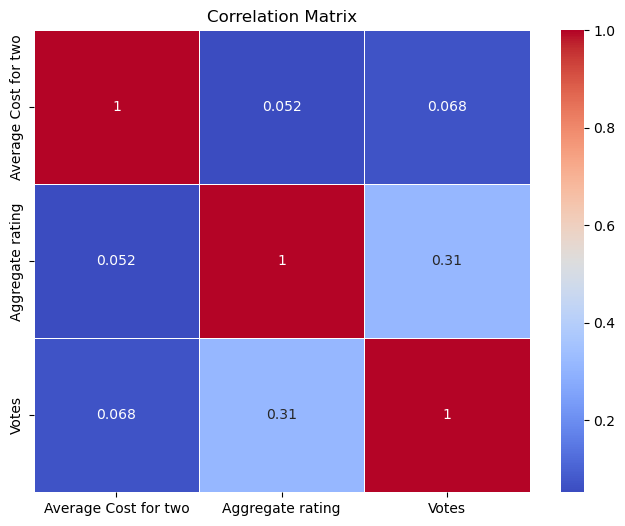

In [81]:
selected_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']

correlation_matrix = data_final[selected_columns].corr()
print(correlation_matrix )
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


- The diagonal elements represent the correlation of each variable with itself, which is always 1 (perfect correlation).
- The off-diagonal elements show the correlation between pairs of variables.
- The correlation coefficient ranges from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value  closer to -1 indicates a strong negative correlation.


- `'Average Cost for two'` and `'Aggregate rating'` have a positive correlation of approximately 0.05.
- `'Aggregate rating'` and `'Votes'` have a stronger positive correlation of approximately 0.31.
- `'Average Cost for two'` and `'Votes'` also have a positive correlation of approximately 0.07.

## Geographical Distribution:

In [48]:
longitude = data_final['Longitude']
latitude =  data_final['Latitude']
locations = data_final['City']

data = {'Longitude': longitude, 'Latitude': latitude, 'Location': locations}
df = pd.DataFrame(data)

# Create a scatter map using Plotly Express
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    text='Location',
    size_max=10,
    zoom=1,
)

fig.update_layout(
    mapbox_style='open-street-map',  
    mapbox_center={'lat': 0, 'lon': 0},
)

fig.show()

# Top Five Cities with Higest Number of Zomato Restaurants

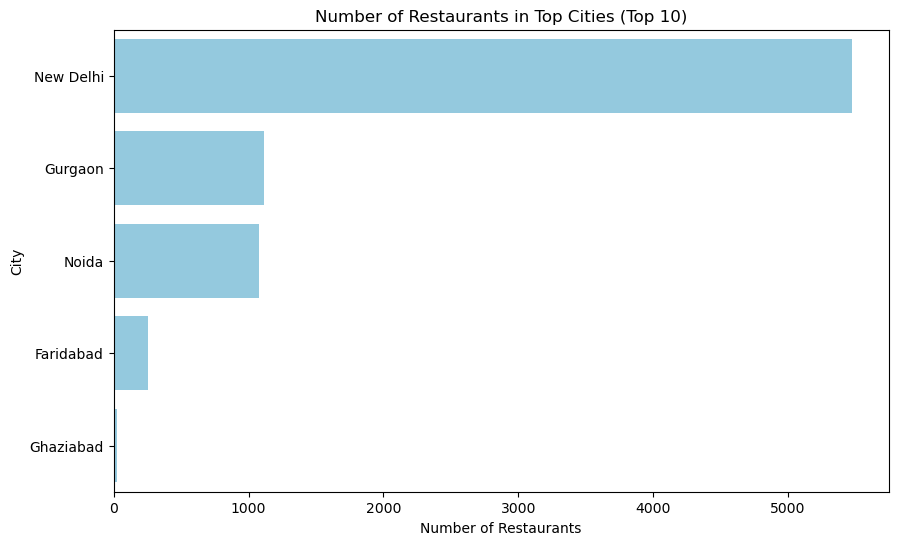

In [58]:
city_counts = data_final['City'].value_counts()
top_cities = city_counts.head()
top_cities_df = pd.DataFrame({'City': top_cities.index, 'Count': top_cities.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='City', data=top_cities_df, color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Number of Restaurants in Top Cities (Top 10)')
plt.show()

- From the above barplot we can see that all the top five zomato restaurants are located in india.

## Conclusion

In this project, a comprehensive analysis of a Zomato dataset was conducted to gain valuable insights into the geographical distribution, rating patterns, and potential correlations between various variables.

1. Geographical Distribution:

A thorough examination of the dataset revealed the diverse geographical distribution of restaurants across different countries and cities.
The exploration focused on identifying cities with the highest concentration of restaurants, providing a clear picture of Zomato's global presence and popularity in specific regions.

2. Rating Analysis:

The distribution of aggregate ratings was analyzed to understand the overall satisfaction level of users on the Zomato platform.
This analysis uncovered the diversity of ratings, allowing for insights into user preferences and experiences with restaurants.

3.Correlation Analysis:

Correlation analysis was performed to uncover potential relationships between variables, with a specific focus on the correlation between rating and votes.